# Logistic Regression + Influence Measures

By Vivian Zeng 02/03/2021

U of Notre Dame

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

**Logistic Regression Assumptions**

**1.** Binary logistic regression requires the dependent variable to be binary.

**2.** For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

**3.** Only the meaningful variables should be included.

**4.** The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

**5.** The independent variables are linearly related to the log odds.

**6.** Logistic regression requires quite large sample sizes.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas.util.testing as tm
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 250
plt.rc("font", size=15)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
#Read Text file
#fileObject = open("nes96_mod.txt", "r")
#data = fileObject.read()
#data

# Data Preprocessing

In [3]:
data = pd.read_csv('nes96_mod.txt', sep="\s{4}", header = None, engine='python')
data.head()

,0
0,"""popul""\t""TVnews""\t""selfLR""\t""ClinLR""\t""DoleLR..."
1,"""1""\t0\t7\t""extCon""\t""extLib""\t""Con""\t""strRep""..."
2,"""2""\t190\t1\t""sliLib""\t""sliLib""\t""sliCon""\t""we..."
3,"""3""\t31\t7\t""Lib""\t""Lib""\t""Con""\t""weakDem""\t24..."
4,"""4""\t83\t4\t""sliLib""\t""Mod""\t""sliCon""\t""weakDe..."


In [4]:
#data = pd.read_csv('nes96_mod.txt', sep="\s+", header = None)
#data = pd.read_csv('nes96_mod.txt', delim_whitespace=True, header = None)
#data = pd.read_csv('nes96_mod.txt', sep="\t", header = None)
data = pd.read_csv('nes96_mod.txt', sep="\t", error_bad_lines=False)
data.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500


In [5]:
PID2=0
data['PID2']=PID2
data.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [6]:
data.shape

(944, 12)

In [7]:
data.PID.unique()

array(['strRep', 'weakDem', 'strDem', 'indRep', 'indind', 'weakRep',
       'indDem'], dtype=object)

In [8]:
remove_list = ['indind']
df=data[~data['PID'].isin(remove_list)]
df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [9]:
df.PID.unique()

array(['strRep', 'weakDem', 'strDem', 'indRep', 'weakRep', 'indDem'],
      dtype=object)

In [10]:
repub_list = ['strRep','indRep', 'weakRep']
df[~df['PID'].isin(repub_list)].PID2==1
df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [12]:
df.PID2[(df.PID.isin(['strRep','indRep', 'weakRep']))]=1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.PID2.unique()

array([1, 0])

In [14]:
df=df[['PID2','income2','age']]
df.shape

(907, 3)

In [15]:
df.income2.unique()

array([  1500,   4000,   6000,   8000,   9000,  10500,  11500,  12500,
        13500,  14500,  16000,  18500,  21000,  23500,  27500,  32500,
        37500,  42500,  47500,  55000,  67500,  82500,  97500, 105000])

# EDA

In [16]:
df.PID2.value_counts()

0    488
1    419
Name: PID2, dtype: int64

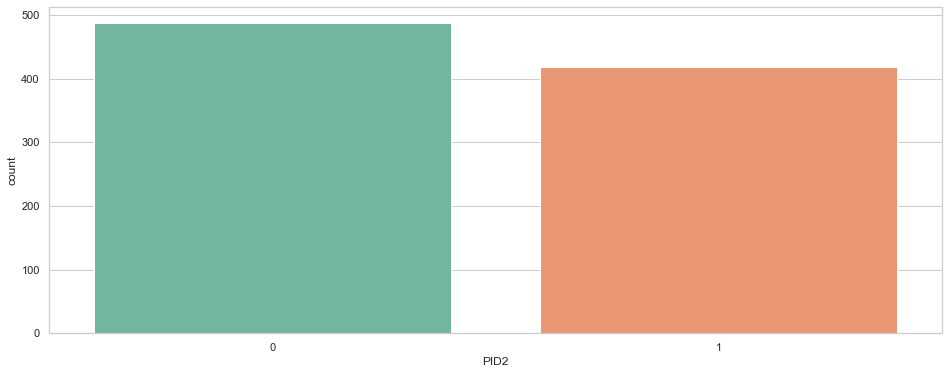

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PID2', data=df, palette="Set2")
plt.show()
plt.savefig('count_plot')

**The distribution of response is balanced, if not, use resampler such as SMOT to do the resampling**

In [18]:
count_no_sub = len(df[df['PID2']==0])
count_sub = len(df[df['PID2']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 53.8037486218302
percentage of subscription 46.19625137816979


In [19]:
df.groupby('PID2').describe()

income2                                                                 \
       count          mean           std     min      25%      50%      75%   
PID2                                                                          
0      488.0  40201.844262  28045.920410  1500.0  18500.0  32500.0  55000.0   
1      419.0  51952.267303  29575.082674  1500.0  27500.0  47500.0  67500.0   

                  age                                                      
           max  count       mean        std   min   25%   50%   75%   max  
PID2                                                                       
0     105000.0  488.0  46.405738  16.567184  19.0  34.0  43.0  57.0  91.0  
1     105000.0  419.0  47.761337  16.419306  19.0  35.0  45.0  59.5  89.0

In [20]:
df.groupby('PID2').median()

,income2,age
PID2,,
0,32500,43
1,47500,45


In [21]:
# %matplotlib inline
# pd.crosstab(df.age,data.PID2).plot(kind='bar')
# plt.title('Vote VS Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency of Vote')
# plt.savefig('Vote_Age') 

In [22]:
df.isna().sum()

PID2       0
income2    0
age        0
dtype: int64

In [23]:
df.head()

,PID2,income2,age
1,1,1500,36
2,0,1500,20
3,0,1500,24
4,0,1500,28
5,0,1500,68


# Get the predictors and response, and train, predict dataset

In [24]:
#X = df.loc[:, df.columns != 'PID2']
#y = df.loc[:, df.columns == 'PID2']

In [25]:
y = df.PID2.values
X = df.drop('PID2', axis=1).values
num_cols = [0, 1]
scaler = StandardScaler()
X[:, num_cols] = scaler.fit_transform(X[:, num_cols])

In [26]:
print(df.shape)
print(X.shape)
print(y.shape)

(907, 3)
(907, 2)
(907,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2021)

# Logistic Regression Model Fitting and Evaluation

In [28]:
lr=LogisticRegression(C=10000)
lr.fit(X_train,y_train)

LogisticRegression(C=10000)

In [29]:
lr.coef_

array([[0.4138599 , 0.32221424]])

In [30]:
lr.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [31]:
lr.predict_proba(X)

array([[0.64952569, 0.35047431],
       [0.71893181, 0.28106819],
       [0.71893181, 0.28106819],
       ...,
       [0.34873036, 0.65126964],
       [0.34873036, 0.65126964],
       [0.34873036, 0.65126964]])

In [32]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [50]:
#print(lr.summary())

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[76 22]
 [55 29]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66        98
           1       0.57      0.35      0.43        84

    accuracy                           0.58       182
   macro avg       0.57      0.56      0.55       182
weighted avg       0.57      0.58      0.56       182



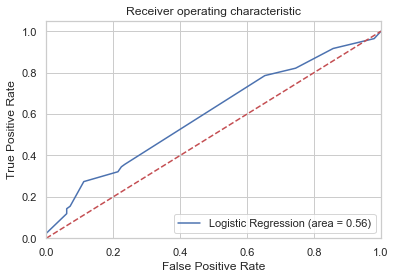

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Implementing the model

In [36]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.679950
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.015     
Dependent Variable: y                AIC:              989.9276  
Date:               2021-02-03 13:28 BIC:              999.0999  
No. Observations:   725              Log-Likelihood:   -492.96   
Df Model:           1                LL-Null:          -500.44   
Df Residuals:       723              LLR p-value:      0.00010985
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.3895      0.1064    3.6600    0.0003    0.1809    0.5981
x2        0.2837      0.1130    2.5113    0.0120    0.

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.680034
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.015     
Dependent Variable: y                AIC:              1237.5822 
Date:               2021-02-03 13:28 BIC:              1247.2025 
No. Observations:   907              Log-Likelihood:   -616.79   
Df Model:           1                LL-Null:          -626.06   
Df Residuals:       905              LLR p-value:      1.6703e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.4082      0.0932    4.3819    0.0000    0.2256    0.5908
x2        0.2321      0.1018    2.2785    0.0227    0.

In [38]:
import statsmodels.api as sm 
X_train1 = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.15
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.70e-05
Time:                        13:28:39   Log-Likelihood:                -513.08
No. Observations:                 725   AIC:                             1032.
Df Residuals:                     722   BIC:                             1046.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4506      0.018     24.420      0.000       0.414       0.487
x1             0.0998      0.025      3.983      0.000       0.051       0.149
x2             0.0775      0.027      2.833      0.005       0.024       0.131
==============================================================================
Omnibus:                     3122.066   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.056
Skew:                           0.143   Prob(JB):                     5.66e-24
Kurtosis:                       1.139   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
import statsmodels.api as sm 
X1 = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.047
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              22.21
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                    3.84e-10
Time:                        13:28:39   Log-Likelihood:                         -915.03
No. Observations:                 907   AIC:                                      1834.
Df Residuals:                     905   BIC:                                      1844.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1618      0.029      5.507      0.000       0.104       0.219
x2             0.1397      0.033      4.201      0.000       0.074       0.205
==============================================================================
Omnibus:                     4704.261   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.610
Skew:                           0.135   Prob(JB):                     7.08e-24
Kurtosis:                       1.342   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Influence Measures for GLM Logit

### Cook's Distance

**Cook’s distance** is used to identify influential observations in a regression model.

The formula for Cook’s distance is:

D$_{i}$ = (r$_{i}$$^{2}$ / p*MSE) * (h$_{ii}$ / (1-h$_{ii}$)$^{2}$)

where:

r$_{i}$ is the ith residual

p is the number of coefficients in the regression model

MSE is the mean squared error

h$_{ii}$ is the i$^{th}$ leverage value

Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted. The larger the value for Cook’s distance, the more influential a given observation.

A general rule of thumb is that any observation with a Cook’s distance greater than **4/n (where n = total observations)** is considered to be highly influential.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


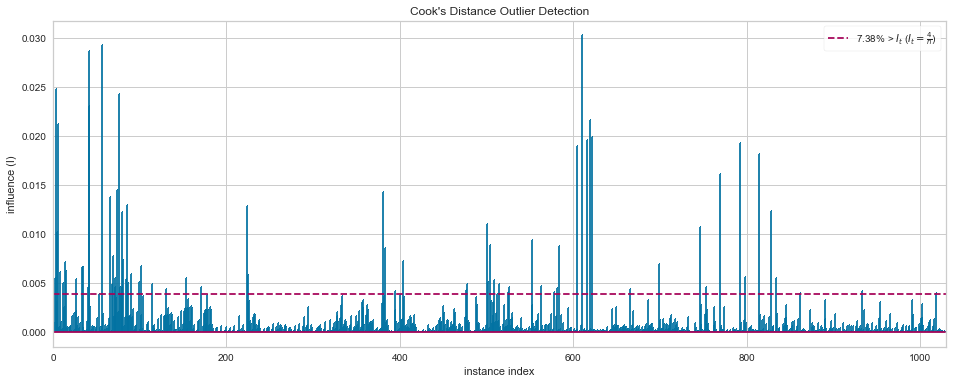

In [48]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
plt.figure(figsize=(16, 6))
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()


In [83]:
import os.path
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
plt.rcParams['text.color'] = "#cfcfcf"
plt.rc("figure", figsize=(16,10))
plt.rc("font", size=12)

In [72]:
import statsmodels.stats.tests.test_influence
test_module = statsmodels.stats.tests.test_influence.__file__
cur_dir = cur_dir = os.path.abspath(os.path.dirname(test_module))

In [73]:
res = GLM(y, X, family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               strength   No. Observations:                 1030
Model:                            GLM   Df Residuals:                     1022
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Feb 2021   Deviance:                   2.8575e+06
Time:                        13:50:10   Pearson chi2:                 6.92e+21
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cement      7.644e+14   2.74e+04   2.79e+10      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


In [74]:
infl = res.get_influence(observed=False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:251: RuntimeWarning: divide by zero encountered in true_divide
  return (2*p - 1) / v**2
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:579: RuntimeWarning: invalid value encountered in multiply
  np.multiply(self.exog.T, factor, out=tmp.T)


In [75]:
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)[:10]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:233: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:234: RuntimeWarning: invalid value encountered in true_divide
  return t/(1 + t)**2


,dfb_cement,dfb_slag,dfb_ash,dfb_water,dfb_splast,dfb_coarse,dfb_fine,dfb_age,cooks_d,standard_resid,hat_diag,dffits_internal
756,3.816755e+08,1.613515e+08,1.901530e+08,-3.830690e+08,-2.451129e+08,3.158086e+08,-1.364822e+08,5.578110e+08,8.597369e+16,4.977829e+09,0.027008,NaN
168,-1.072390e+08,-1.725933e+08,-3.759339e+08,1.382380e+08,6.368327e+08,-5.062721e+07,-8.561996e+07,1.567390e+08,8.585310e+16,4.748126e+09,0.029564,NaN
828,6.259111e+08,3.422565e+08,3.572850e+08,-5.170344e+08,-6.039374e+08,-2.300404e+08,5.578338e+08,3.101110e+07,8.118707e+16,5.028574e+09,0.025042,NaN
145,-1.084901e+08,-1.808853e+08,-3.792208e+08,1.571998e+08,6.280464e+08,-5.027790e+07,-9.448346e+07,6.735774e+07,7.991832e+16,4.650733e+09,0.028711,NaN
122,-1.073556e+08,-1.836829e+08,-3.744345e+08,1.685131e+08,6.093677e+08,-4.905011e+07,-9.936917e+07,-1.467496e+06,7.384315e+16,4.486881e+09,0.028507,NaN
820,2.653219e+08,6.951109e+07,1.091596e+08,-2.200183e+08,-1.381797e+08,2.519545e+08,-1.794360e+08,4.723998e+08,5.959469e+16,4.488987e+09,0.023112,NaN
755,3.561315e+08,1.231041e+08,1.526378e+08,-3.091393e+08,-2.226418e+08,3.004175e+08,-1.586891e+08,3.073062e+08,5.493952e+16,4.784692e+09,0.018837,NaN
181,-1.248173e+07,7.501407e+07,-2.137044e+08,-6.012728e+07,3.861251e+08,1.305462e+08,-1.228535e+08,1.899538e+08,5.347398e+16,5.514415e+09,0.013873,NaN
171,-3.340579e+07,-2.347970e+08,-2.940187e+08,1.075295e+08,4.460647e+08,-1.117808e+08,1.602348e+07,1.119353e+08,5.262692e+16,3.957769e+09,0.026174,NaN
148,-3.610243e+07,-2.430623e+08,-3.012060e+08,1.251508e+08,4.465262e+08,-1.115343e+08,6.913803e+06,3.846745e+07,5.047557e+16,3.929191e+09,0.025489,NaN


<Figure size 1152x720 with 0 Axes>

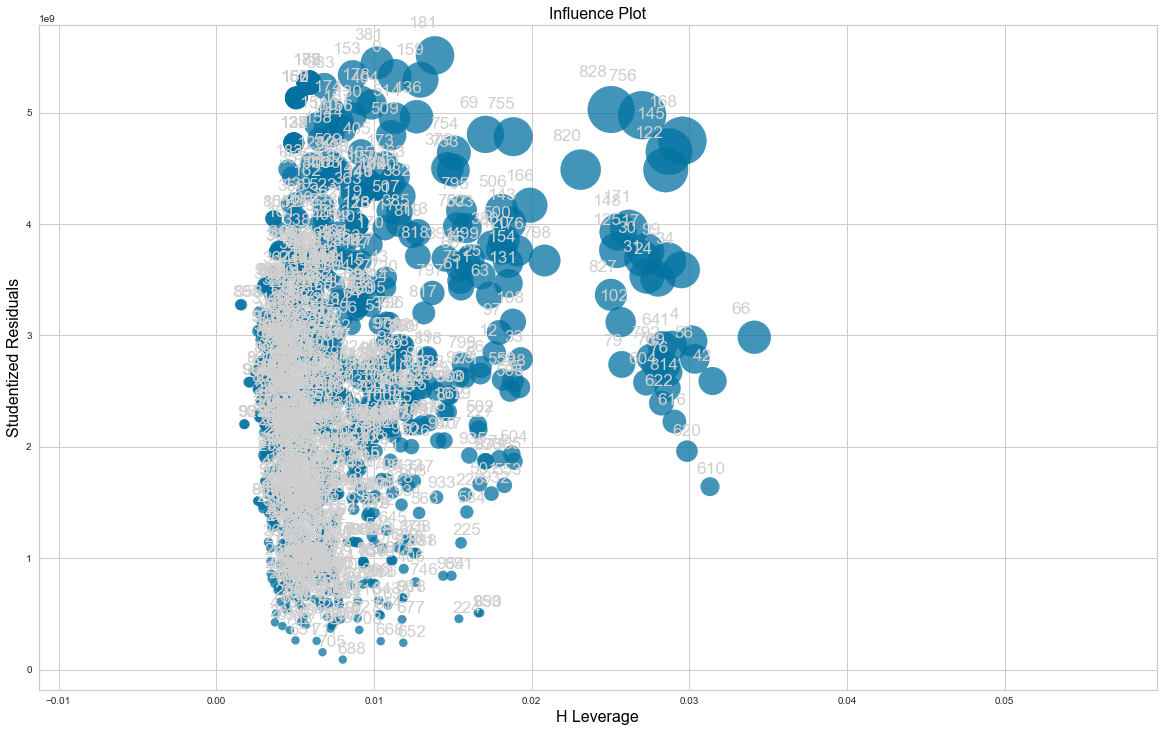

In [84]:
plt.figure(figsize=(16, 10))
fig = infl.plot_influence()
fig.tight_layout(pad=0.1)

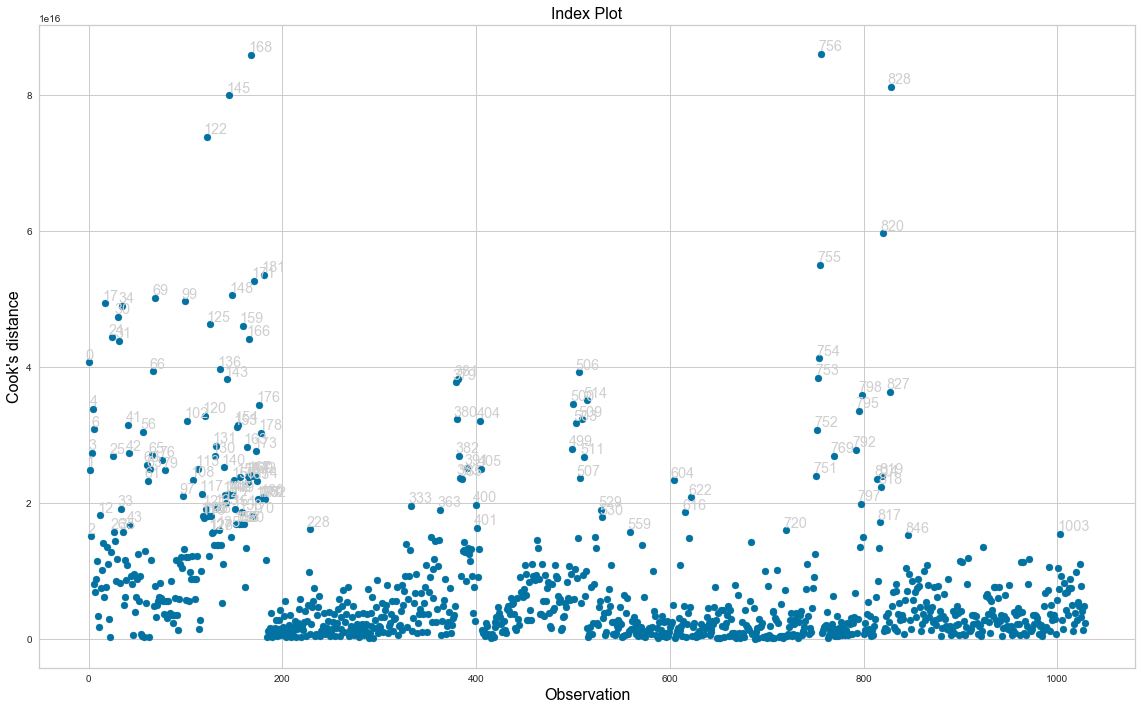

In [85]:
fig = infl.plot_index(y_var='cooks', threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)

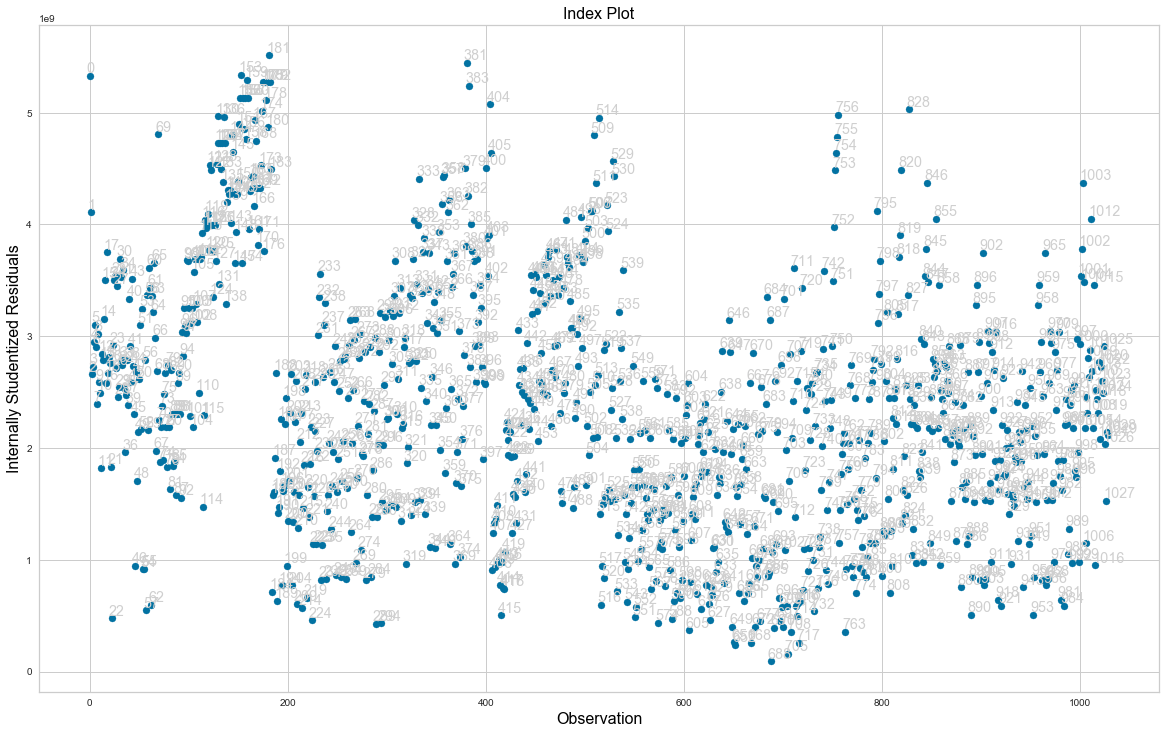

In [86]:
fig = infl.plot_index(y_var='resid', threshold=1)
fig.tight_layout(pad=0)

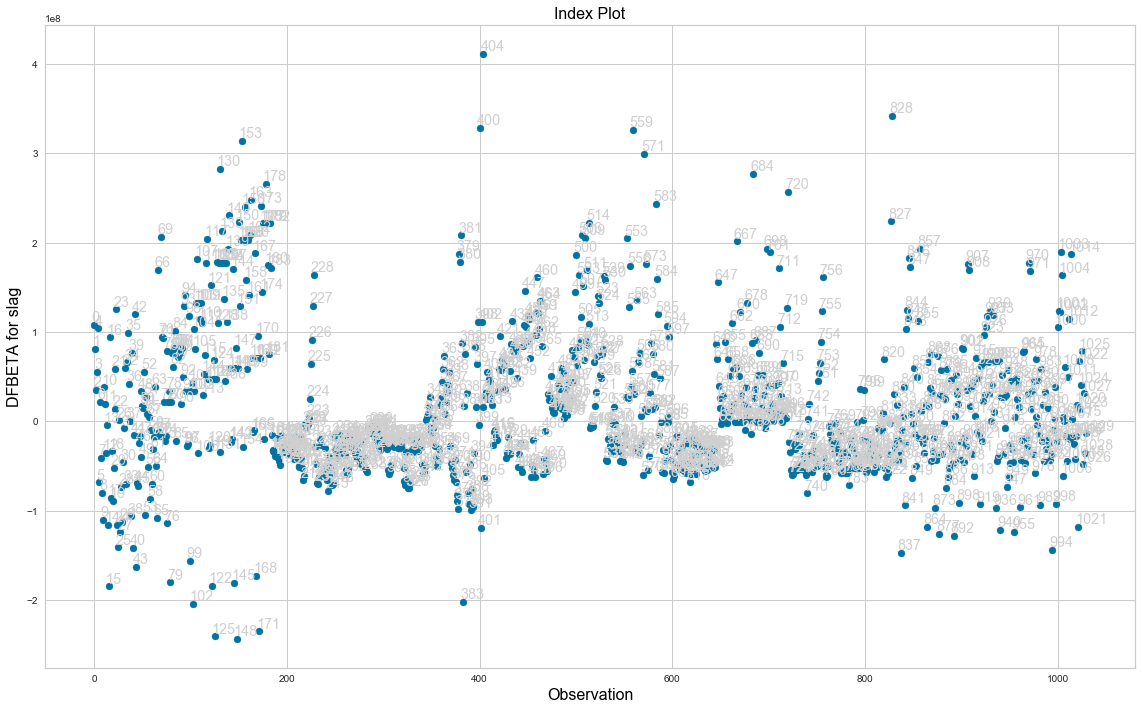

In [87]:
fig = infl.plot_index(y_var='dfbeta', idx=1, threshold=0.5)
fig.tight_layout(pad=1.0)

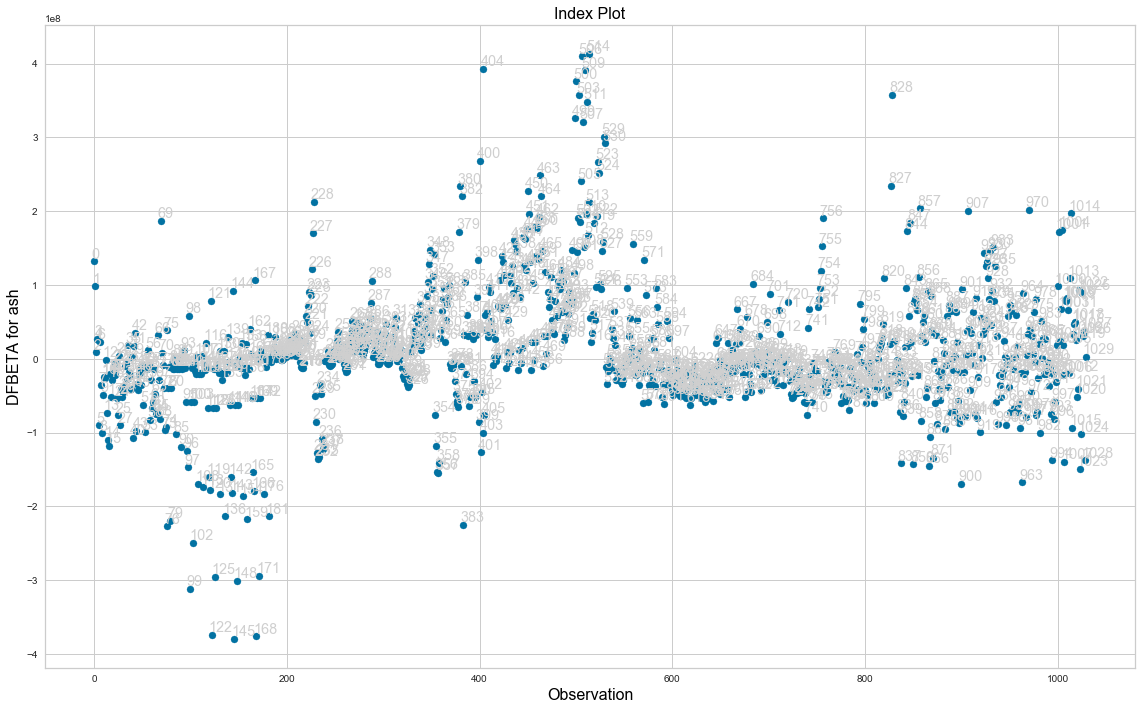

In [88]:
fig = infl.plot_index(y_var='dfbeta', idx=2, threshold=0.5)
fig.tight_layout(pad=1.0)

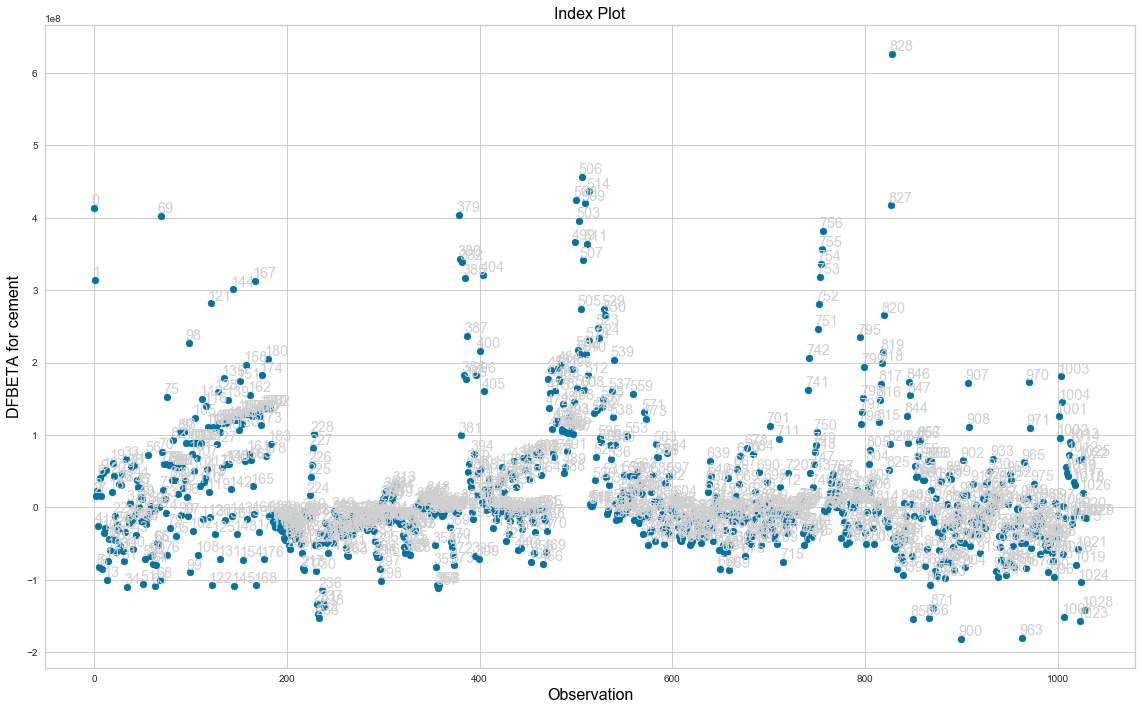

In [89]:
fig = infl.plot_index(y_var='dfbeta', idx=0, threshold=0.5)
fig.tight_layout(pad=1.0)